<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Design_HashSet_(Easy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Design HashSet

Design a HashSet without using any built-in hash table libraries.

Implement MyHashSet class:

- void add(key) Inserts the value key into the HashSet.
- bool contains(key) Returns whether the value key exists in the HashSet or not.
- void remove(key) Removes the value key in the HashSet. If key does not exist in the HashSet, do nothing.
 

Example 1:

```
Input
["MyHashSet", "add", "add", "contains", "contains", "add", "contains", "remove", "contains"]
[[], [1], [2], [1], [3], [2], [2], [2], [2]]
Output
[null, null, null, true, false, null, true, null, false]

Explanation
MyHashSet myHashSet = new MyHashSet();
myHashSet.add(1);      // set = [1]
myHashSet.add(2);      // set = [1, 2]
myHashSet.contains(1); // return True
myHashSet.contains(3); // return False, (not found)
myHashSet.add(2);      // set = [1, 2]
myHashSet.contains(2); // return True
myHashSet.remove(2);   // set = [1]
myHashSet.contains(2); // return False, (already removed)
```



Constraints:

```
0 <= key <= 106
At most 104 calls will be made to add, remove, and contains.
```



# Solution 1: LinkedList as Bucket

In [1]:
# k = key range
# n = number of elements
# assuming values are evenly distributed.

class MyHashSet:

    # Time  = O(k)
    # Space = O(k + n)
    def __init__(self):
        self.keyRange = 769 # a prime number
        self.bucketArray = [Bucket() for i in range(self.keyRange)]

    def _hash(self, key):
        return key % self.keyRange
    
    # Time = O(n/k)
    # Space = O(1)
    def add(self, key: int) -> None:
        bucketIndex = self._hash(key)
        self.bucketArray[bucketIndex].insert(key)
        
    # Time = O(n/k)
    # Space = O(1)
    def remove(self, key: int) -> None:
        bucketIndex = self._hash(key)
        self.bucketArray[bucketIndex].delete(key)
        
    # Time = O(n/k)
    # Space = O(1)
    def contains(self, key: int) -> bool:
        bucketIndex = self._hash(key)
        return self.bucketArray[bucketIndex].exists(key)
        
        
class Node:
    def __init__(self, value, nextNode=None):
        self.value = value
        self.next = nextNode
        
class Bucket:
    
    def __init__(self):
        # pseudo head
        self.head = Node(0)

    def delete(self, value):
        prev = self.head
        curr = self.head.next
        while curr is not None:
            if curr.value == value:
                prev.next = curr.next
                return
            prev = curr
            curr = curr.next
    
    def insert(self, newValue):
        if not self.exists(newValue):
            newNode = Node(newValue, self.head.next)
            # set the new head.
            self.head.next = newNode

    def exists(self, value):
        curr = self.head.next
        while curr is not None:
            if curr.value == value:
                return True
            curr = curr.next
        return False  

# Your MyHashSet object will be instantiated and called as such:
# obj = MyHashSet()
# obj.add(key)
# obj.remove(key)
# param_3 = obj.contains(key)

In [2]:
myHashSet = MyHashSet()
myHashSet.add(1)
myHashSet.add(2)
print(myHashSet.contains(1))
print(myHashSet.contains(3))
myHashSet.add(2)
print(myHashSet.contains(2))
myHashSet.remove(2)
print(myHashSet.contains(2))

True
False
True
False


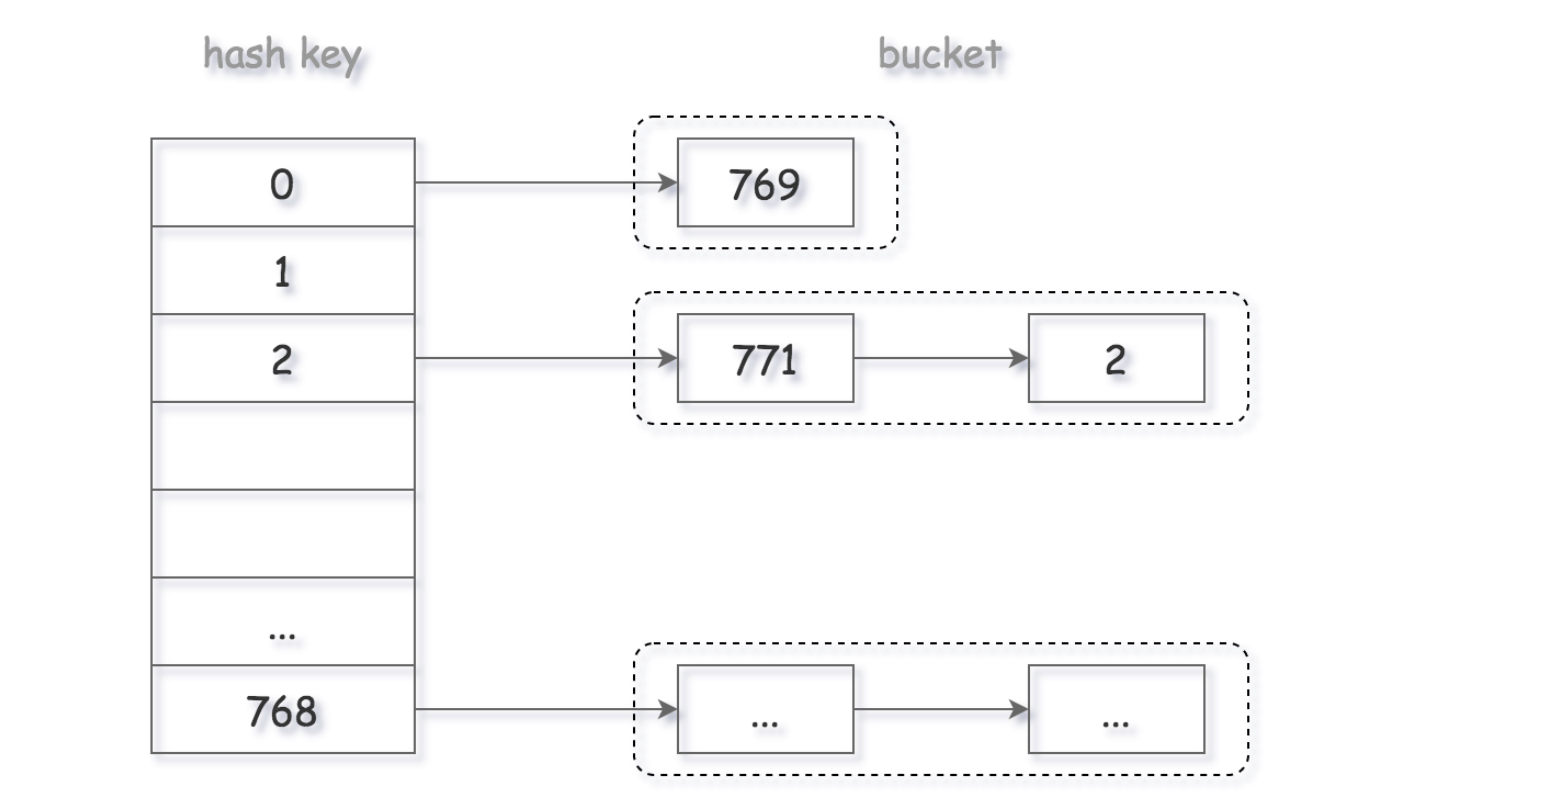

# Solution 2 BST as bucket

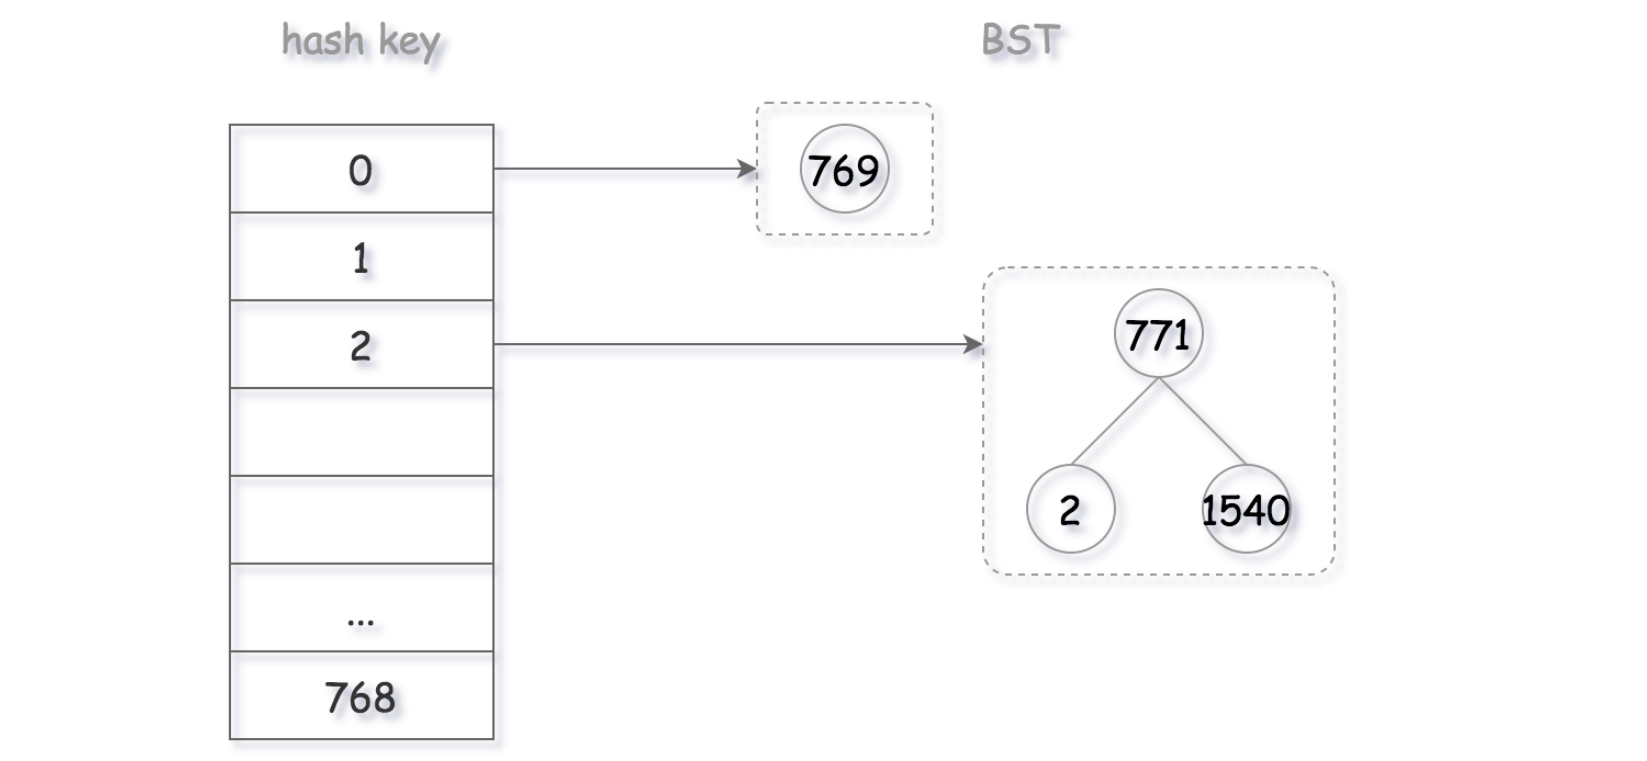

In [3]:
class MyHashSet:
    
    # Time  = O(k)
    # Space = O(k + n)
    def __init__(self):
        self.keyRange = 1061 # a prime number
        self.bucketArray = [Bucket() for i in range(self.keyRange)]

    def _hash(self, key) -> int:
        return key % self.keyRange


    # Time = O(log (n/k))
    # Space = O(1)
    def add(self, key: int) -> None:
        bucketIndex = self._hash(key)
        self.bucketArray[bucketIndex].insert(key)
        

    # Time = O(log (n/k))
    # Space = O(1)
    def remove(self, key: int) -> None:
        bucketIndex = self._hash(key)
        self.bucketArray[bucketIndex].delete(key)
        
    # Time = O(log (n/k))
    # Space = O(1)
    def contains(self, key: int) -> bool:
        bucketIndex = self._hash(key)
        return self.bucketArray[bucketIndex].exists(key)
        
class Bucket:
    def __init__(self):
        self.tree = BSTree()

    def insert(self, value):
        self.tree.root = self.tree.insertIntoBST(self.tree.root, value)

    def delete(self, value):
        self.tree.root = self.tree.deleteNode(self.tree.root, value)

    def exists(self, value):
        return (self.tree.searchBST(self.tree.root, value) is not None)
        
        
class TreeNode:
    def __init__(self, value):
        self.val = value
        self.left = None
        self.right = None
        
class BSTree:
    def __init__(self):
        self.root = None

    def searchBST(self, root: TreeNode, val: int) -> TreeNode:
        if root is None or val == root.val:
            return root

        return self.searchBST(root.left, val) if val < root.val \
            else self.searchBST(root.right, val)

    def insertIntoBST(self, root: TreeNode, val: int) -> TreeNode:
        if not root:
            return TreeNode(val)

        if val > root.val:
            # insert into the right subtree
            root.right = self.insertIntoBST(root.right, val)
        elif val == root.val:
            return root
        else:
            # insert into the left subtree
            root.left = self.insertIntoBST(root.left, val)
        return root

    def successor(self, root):
        root = root.right
        while root.left:
            root = root.left
        return root.val

    def predecessor(self, root):
        root = root.left
        while root.right:
            root = root.right
        return root.val

    def deleteNode(self, root: TreeNode, key: int) -> TreeNode:
        if not root:
            return None

        # delete from the right subtree
        if key > root.val:
            root.right = self.deleteNode(root.right, key)
        # delete from the left subtree
        elif key < root.val:
            root.left = self.deleteNode(root.left, key)
        # delete the current node
        else:
            # the node is a leaf
            if not (root.left or root.right):
                root = None
            # the node is not a leaf and has a right child
            elif root.right:
                root.val = self.successor(root)
                root.right = self.deleteNode(root.right, root.val)
            # the node is not a leaf, has no right child, and has a left child
            else:
                root.val = self.predecessor(root)
                root.left = self.deleteNode(root.left, root.val)

        return root

# Your MyHashSet object will be instantiated and called as such:
# obj = MyHashSet()
# obj.add(key)
# obj.remove(key)
# param_3 = obj.contains(key)

In [4]:
myHashSet = MyHashSet()
myHashSet.add(1)
myHashSet.add(2)
print(myHashSet.contains(1))
print(myHashSet.contains(3))
myHashSet.add(2)
print(myHashSet.contains(2))
myHashSet.remove(2)
print(myHashSet.contains(2))

True
False
True
False
